# Generate noisy data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate clean data
t = np.linspace(0, 4, 100)
frequencies = [1, 2, 3, 4]
amplitudes = [10, 3, 1, 0.2]
phases = [0, 0.2, -0.3, 0.5]
y = 0 * t
for f, A, phi in zip(frequencies, amplitudes, phases):
    w = 2*np.pi*f
    y += A * np.cos(w*t + phi)

# Add measurement noise
noise = 0.5 * np.random.randn(*y.shape)
y = y + noise

# Plot noisy data
plt.plot(t, y, 'ro', label='Noisy Data')
plt.show()

# Perform linear regression to estimate model parameters

$\displaystyle y = \sum_{i=1}^n A_i \cos(\omega_i t + \phi_i) = \sum_{i=1}^n A_i \left[\cos(\omega_i t)\cos(\phi_i) - \sin(\omega_i t)\sin(\phi_i)\right]$  

OR  

$y = [\cos(\omega_1 t),~-\sin(\omega_1 t),~\cdots,~\cos(\omega_n t),~-\sin(\omega_n t)]\theta$  
where  
$\theta = [A_1\cos(\phi_1),~A_1\sin(\phi_1),~\cdots,~A_n\cos(\phi_n),~A_n\sin(\phi_n)]^T$

In [ ]:
sinusoids = []
for f in frequencies:
    w = 2*np.pi*f
    sinusoids += [np.cos(w*t), np.sin(w*t)]
H = np.vstack(sinusoids).T
theta, *_ = np.linalg.lstsq(H, y, rcond=None)

# Evaluate model over entire domain

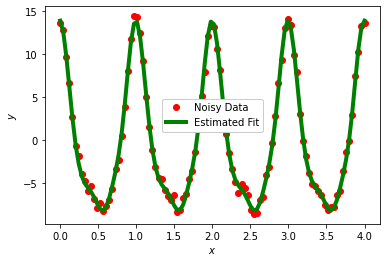

In [3]:
yhat = H @ theta

plt.plot(t, y, 'ro', label='Noisy Data')
plt.plot(t, yhat, 'g', lw=4, label='Estimated Fit')

# Show plot with labels
plt.legend(loc='best', framealpha=1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# CHALLENGE TO STUDENT

In the example above, we assumed knowledge of the correct frequencies when constructing the sinusoids used as a basis to perform linear regression. If you're only given the noisy data (red points above) without the frequencies, how would you perform regression?